# **Data preprocessing**

Visit for more details: https://github.com/Ruban2205/Machine_learning_fundamentals

### **Data Preprocessing Concepts**

- Data reading and Displaying

- Null values Imputation (Mean, Median, Mode, Dropna, fillna) 

- Duplicate data dropping 

- OneHotEncoder 

- LabelEncoder

- KNN Imputer

- Z-Score

- Binarizer 

- Min-Max Scalar
 
- Standard Scalar

- LDA, PCA

- SelectPercentile, chi2, SelectKBest, VarianceThreshold

- Correlation (Highest +ve and -ve) 

- Feature Selection 

- Plotting

In [ ]:
# Data preprocessing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Binarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import z_scores
from sklearn.impute import KNNImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold
from sklearn.model_selection import train_test_split

**1) Data reading and displaying**

In [ ]:
import pandas as pd

data = pd.read_csv("Toyato.csv")
data.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,12950,23,10,2002,46986,Diesel,90,1,0,2000,3.0,Five,210,1165,0.0,1,3
1,12950,23,10,2002,72937,Diesel,90,1,0,2000,3.0,Five,210,1165,0.0,1,3
2,12950,24,9,2002,41711,Diesel,90,1,0,2000,3.0,Five,210,1165,1.0,1,3
3,13950,26,7,2002,48000,Diesel,90,0,0,2000,3.0,Five,210,1165,1.0,1,4
4,17950,30,3,2002,38500,Diesel,90,0,0,2000,3.0,Five,210,1170,1.0,1,5


**2) Null values Imputation (Mean, Median, Mode, Dropna, fillna)**

In [ ]:
# Calculating the percentage of null data

null_percent = (data.isna().sum() / len(data)) * 100
null_percent[null_percent > 0]

Doors            12.0
Mfr_Guarantee    46.0
dtype: float64

In [ ]:
# Calculating the mean of Each data

data.mean()

<ipython-input-188-a49944042583>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Price               15100.100000
Age                    26.280000
Mfg_Month               6.720000
Mfg_Year             2002.000000
KM                  45948.100000
HP                    113.060000
Met_Color               0.600000
Automatic               0.020000
cc                   1694.000000
Doors                   3.272727
Quarterly_Tax         124.940000
Weight               1150.800000
Mfr_Guarantee           0.555556
BOVAG_Guarantee         0.940000
Guarantee_Period        4.260000
dtype: float64

In [ ]:
# Calculating the median for the data

data.median()

<ipython-input-189-45dfbade5d44>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Price               14950.0
Age                    27.0
Mfg_Month               6.0
Mfg_Year             2002.0
KM                  41563.0
HP                     97.0
Met_Color               1.0
Automatic               0.0
cc                   1600.0
Doors                   3.0
Quarterly_Tax          85.0
Weight               1120.0
Mfr_Guarantee           1.0
BOVAG_Guarantee         1.0
Guarantee_Period        3.0
dtype: float64

In [ ]:
# Calculating the mode of the data

data.mode()

,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,12950.0,22.0,11.0,2002.0,72215.0,Petrol,90,1.0,0.0,1400,3.0,Five,85.0,1100.0,1.0,1.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Syntax to calculate the Mean, Median and Mode for a dataset. 
# data['Doors'].mean().sum()
# data['Doors'].median().sum()
# data['Doors'].mode().sum()

In [ ]:
# Filling the null values for the column Doors

data2 = data.copy()
data2['Doors'].fillna(data2['Doors'].mean, inplace=True)
data2.isna().sum()

Price                0
Age                  0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Automatic            0
cc                   0
Doors                0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee       23
BOVAG_Guarantee      0
Guarantee_Period     0
dtype: int64

In [ ]:
# Dropping the null values in Doors Column

doors_drop = data.copy()
doors_drop['Doors'].dropna(inplace=True)
doors_drop.isna().sum()

Price               0
Age                 0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
dtype: int64

In [ ]:
# Filling the null values for the column Mfr_Gurantee

data3 = data.copy()
data3['Mfr_Guarantee'].fillna(data3['Mfr_Guarantee'].mean, inplace=True)
data3.isna().sum()

Price               0
Age                 0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               6
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
dtype: int64

**3) Duplicate Data Dropping**

In [ ]:
# To Find the sum of duplicated data

duplicated_data = data.duplicated().sum()
print(duplicated_data)

0


In [ ]:
data2.shape

(50, 17)

In [ ]:
# To Drop the duplicated data

data4 = data2.copy()
data4.drop_duplicates(inplace=True)

data4.duplicated().sum()

0

**4) One Hot Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np 

In [ ]:
# Taking the categorical values from the dataset 

categorical_data = data.select_dtypes(include=np.object_)
categorical_data.head()

,Fuel_Type,Gears
0,Diesel,Five
1,Diesel,Five
2,Diesel,Five
3,Diesel,Five
4,Diesel,Five


In [ ]:
labels = data4[['Fuel_Type']]

In [ ]:
# One Hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  (25, 1)	1.0
  (26, 1)	1.0
  (27, 1)	1.0
  (28, 1)	1.0
  (29, 1)	1.0
  (30, 1)	1.0
  (31, 1)	1.0
  (32, 1)	1.0
  (33, 1)	1.0
  (34, 1)	1.0
  (35, 1)	1.0
  (36, 1)	1.0
  (37, 1)	1.0
  (38, 1)	1.0
  (39, 1)	1.0
  (40, 1)	1.0
  (41, 1)	1.0
  (42, 1)	1.0
  (43, 0)	1.0
  (44, 0)	1.0
  (45, 0)	1.0
  (46, 0)	1.0
  (47, 1)	1.0
  (48, 0)	1.0
  (49, 0)	1.0


**5) Label Encoder**

In [ ]:
# Label Encoder 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels)

[0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**6) KNN Imputer**

In [ ]:
numerical_data = data2.select_dtypes(include = np.number)
numerical_data.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,12950,23,10,2002,46986,90,1,0,2000,210,1165,0.0,1,3
1,12950,23,10,2002,72937,90,1,0,2000,210,1165,0.0,1,3
2,12950,24,9,2002,41711,90,1,0,2000,210,1165,1.0,1,3
3,13950,26,7,2002,48000,90,0,0,2000,210,1165,1.0,1,4
4,17950,30,3,2002,38500,90,0,0,2000,210,1170,1.0,1,5


In [ ]:
from sklearn.impute import KNNImputer

KNN = KNNImputer(n_neighbors=2)

KNN.fit_transform(numerical_data)

array([[1.29500e+04, 2.30000e+01, 1.00000e+01, 2.00200e+03, 4.69860e+04,
        9.00000e+01, 1.00000e+00, 0.00000e+00, 2.00000e+03, 2.10000e+02,
        1.16500e+03, 0.00000e+00, 1.00000e+00, 3.00000e+00],
       [1.29500e+04, 2.30000e+01, 1.00000e+01, 2.00200e+03, 7.29370e+04,
        9.00000e+01, 1.00000e+00, 0.00000e+00, 2.00000e+03, 2.10000e+02,
        1.16500e+03, 0.00000e+00, 1.00000e+00, 3.00000e+00],
       [1.29500e+04, 2.40000e+01, 9.00000e+00, 2.00200e+03, 4.17110e+04,
        9.00000e+01, 1.00000e+00, 0.00000e+00, 2.00000e+03, 2.10000e+02,
        1.16500e+03, 1.00000e+00, 1.00000e+00, 3.00000e+00],
       [1.39500e+04, 2.60000e+01, 7.00000e+00, 2.00200e+03, 4.80000e+04,
        9.00000e+01, 0.00000e+00, 0.00000e+00, 2.00000e+03, 2.10000e+02,
        1.16500e+03, 1.00000e+00, 1.00000e+00, 4.00000e+00],
       [1.79500e+04, 3.00000e+01, 3.00000e+00, 2.00200e+03, 3.85000e+04,
        9.00000e+01, 0.00000e+00, 0.00000e+00, 2.00000e+03, 2.10000e+02,
        1.17000e+03, 1.000

**7) Z-Score**

In [ ]:
mean = data.mean().sum()
std = data.std().sum()

z_scores = ((numerical_data - mean) / std)
z_scores.head()

<ipython-input-204-5580ca48d83e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean().sum()
<ipython-input-204-5580ca48d83e>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std().sum()


,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,-1.980406,-2.461390,-2.461874,-2.387756,-0.714003,-2.458897,-2.462209,-2.462246,-2.38783,-2.454432,-2.418899,-2.462246,-2.462209,-2.462134
1,-1.980406,-2.461390,-2.461874,-2.387756,0.251575,-2.458897,-2.462209,-2.462246,-2.38783,-2.454432,-2.418899,-2.462246,-2.462209,-2.462134
2,-1.980406,-2.461353,-2.461911,-2.387756,-0.910274,-2.458897,-2.462209,-2.462246,-2.38783,-2.454432,-2.418899,-2.462209,-2.462209,-2.462134
3,-1.943198,-2.461278,-2.461985,-2.387756,-0.676275,-2.458897,-2.462246,-2.462246,-2.38783,-2.454432,-2.418899,-2.462209,-2.462209,-2.462097
4,-1.794367,-2.461130,-2.462134,-2.387756,-1.029748,-2.458897,-2.462246,-2.462246,-2.38783,-2.454432,-2.418713,-2.462209,-2.462209,-2.462060


In [ ]:
# Removing zscore value greater than 3

mask = (z_scores > 3)
mask.sum()

Price               0
Age                 0
Mfg_Month           0
Mfg_Year            0
KM                  0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
dtype: int64

**8) Binarizer**

In [ ]:
# If error faced due to binarizer. run this to solve. 

Null1 = numerical_data.isna().sum()
Null1[Null1 > 0]

Mfr_Guarantee    23
dtype: int64

In [ ]:
numerical_data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 25)
binarized = binarizer.fit_transform(numerical_data)
binarized

array([[1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1

**9) Min-Max Scalar**

In [ ]:
# Min-Max Scalar

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scaled_features = scalar.fit_transform(numerical_data)

scaled_features[:1]

array([[0.02162162, 0.1       , 0.9       , 0.        , 0.43878297,
        0.17073171, 1.        , 0.        , 1.        , 1.        ,
        0.55555556, 0.        , 1.        , 0.        ]])

In [ ]:
# Standard Scalar 

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scaled_featuers = scalar.fit_transform(numerical_data)
scaled_features[:1]

array([[0.02162162, 0.1       , 0.9       , 0.        , 0.43878297,
        0.17073171, 1.        , 0.        , 1.        , 1.        ,
        0.55555556, 0.        , 1.        , 0.        ]])

**10) LDA, PCA**

LDA - LinearDiscriminantAnalysis

PCA

In [ ]:
data5 = data 
data5.dropna(inplace=True)

In [ ]:
x = data5.drop(['Fuel_Type','Gears'], axis=1)
# x = x.select_dtypes(include=['int64', 'float64'])
y = data5[['Fuel_Type']]

In [ ]:
# To find the null values 
# x = data.isna().sum()

# To drop the null values. 
# x.dropna(inplace = True)

x.shape
y.shape

(26, 1)

In [ ]:
# LDA - Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components = 1)
extracted_data = LDA.fit_transform(x, y)
extracted_data

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-13.68873726],
       [-13.6055062 ],
       [-13.0235797 ],
       [-14.22321604],
       [-14.1732171 ],
       [-13.47120531],
       [-13.34911884],
       [-13.36454881],
       [  8.13021454],
       [-13.16516464],
       [  8.45754441],
       [  7.9982076 ],
       [  6.82218341],
       [  7.24831255],
       [  6.83205717],
       [  6.82035496],
       [  5.80394142],
       [  4.68577679],
       [  7.33854282],
       [  5.42495362],
       [  7.32774704],
       [  8.23156037],
       [  7.4741966 ],
       [  9.26097117],
       [  8.16864873],
       [  6.0390807 ]])

In [ ]:
# PCA 

from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
extracted_data = pca.fit_transform(x)
extracted_data

array([[ 2.37450169e+03, -2.50362716e+03,  3.08237920e+02,
         2.46786177e+00, -1.52522369e+01, -6.59185074e-02,
        -3.10513065e-01],
       [ 2.83245494e+04, -2.64844334e+03,  1.40479708e+02,
         9.40099754e+00,  3.45201235e-01,  4.36042603e+00,
         7.19105849e-01],
       [-2.90030473e+03, -2.47418820e+03,  3.42336223e+02,
         1.05262239e+00, -1.83922177e+01, -9.95363543e-01,
        -3.84939291e-01],
       [ 3.39400743e+03, -1.50931887e+03,  2.95867622e+02,
         5.69815089e+00, -1.65506544e+01,  1.14396260e+00,
         9.45219823e-01],
       [-6.08346659e+03,  2.54356195e+03,  3.34670206e+02,
         1.04490761e+01, -2.96089127e+01,  2.30982845e+00,
         1.15326544e+00],
       [ 1.64381569e+04,  6.46784307e+03,  1.65686178e+02,
         2.85561547e+01, -2.41627757e+01,  1.09260463e+01,
        -4.95521299e-01],
       [ 5.00099272e+04, -7.69141885e+02, -1.01174756e+00,
        -5.26968242e+01,  1.84368431e+01, -1.72337848e+01,
        -5.6342223

**11) Feature Seletion - SelectPercentile, KBest, chi-squared, VarianceThreshold**

In [ ]:
# Using label encoder to convert categorical values into numerical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded = le.fit_transform(y)
print(encoded)

[0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Testing the dataset for accuracy

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
# Chi Squared Test

from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold, mutual_info_classif

selector = SelectKBest(score_func=chi2, k=3)
newda = selector.fit_transform(abs(x), encoded)
support = selector.get_support()
print(list(x.columns[support]))

['KM', 'cc', 'Quarterly_Tax']


In [ ]:
# Using Information

info = SelectKBest(score_func = mutual_info_classif, k=3)
newdata1 = info.fit_transform(abs(x), encoded)
supports = info.get_support()
print(list(x.columns[supports]))

['HP', 'cc', 'Quarterly_Tax']


In [ ]:
# Variance Threshold

from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(4)
newdata = variance.fit_transform(x)
print(f"Old Shape = {x.shape} \nNew Shape: {newdata.shape}")

Old Shape = (26, 15) 
New Shape: (26, 8)


**12) Correlation (High positive, High Negative)**

In [ ]:
# Correlation 

corr = x.corr()
corr


,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
Price,1.000000,0.940183,-0.940183,NaN,0.051110,0.074260,-0.155809,0.137090,0.081279,NaN,0.029680,0.233013,0.293034,0.340150,0.133007
Age,0.940183,1.000000,-1.000000,NaN,0.007842,0.191662,-0.096767,0.143126,0.018142,NaN,-0.082660,0.207157,0.393776,0.401475,0.184860
Mfg_Month,-0.940183,-1.000000,1.000000,NaN,-0.007842,-0.191662,0.096767,-0.143126,-0.018142,NaN,0.082660,-0.207157,-0.393776,-0.401475,-0.184860
Mfg_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM,0.051110,0.007842,-0.007842,NaN,1.000000,-0.417615,0.019692,-0.006770,0.556036,NaN,0.622197,0.514409,-0.222342,0.159222,-0.406986
HP,0.074260,0.191662,-0.191662,NaN,-0.417615,1.000000,-0.151382,0.068354,-0.228279,NaN,-0.435180,-0.008790,-0.074232,-0.008043,0.107736
Met_Color,-0.155809,-0.096767,0.096767,NaN,0.019692,-0.151382,1.000000,-0.300000,-0.320315,NaN,-0.172295,-0.101721,0.218596,0.120281,0.059586
Automatic,0.137090,0.143126,-0.143126,NaN,-0.006770,0.068354,-0.300000,1.000000,-0.091843,NaN,-0.073298,0.151255,-0.216025,0.057735,0.105153
cc,0.081279,0.018142,-0.018142,NaN,0.556036,-0.228279,-0.320315,-0.091843,1.000000,NaN,0.913107,0.759948,-0.154838,0.260217,-0.316551
Doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Highest positive correlation "Change the threshold as per you dataset correlation values"
correlated = []
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[1]):
    if abs(corr.iloc[i,j]) > 0.40:
      correlated.append(corr.columns[i])
print(list(set(correlated)))

['Mfg_Month', 'HP', 'KM', 'Quarterly_Tax', 'cc', 'Age', 'Price']


In [ ]:
#Highest Negative correlation "Change the threshold as per you dataset correlation values"

correlated_row = []
correlated_col = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if (corr.iloc[i,j]) < 0 and corr.iloc[i,j] <= -0.1:
            correlated_row.append(corr.columns[i])
            correlated_col.append(corr.columns[j])

print(correlated_row)
print(correlated_col)

['Price', 'Price', 'Age', 'Mfg_Month', 'Mfg_Month', 'Mfg_Month', 'Mfg_Month', 'Mfg_Month', 'Mfg_Month', 'KM', 'KM', 'KM', 'HP', 'HP', 'HP', 'Met_Color', 'Met_Color', 'Met_Color', 'Met_Color', 'Automatic', 'cc', 'cc', 'Quarterly_Tax', 'Quarterly_Tax', 'Weight', 'Weight']
['Mfg_Month', 'Met_Color', 'Mfg_Month', 'HP', 'Automatic', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'Met_Color', 'cc', 'Quarterly_Tax', 'Automatic', 'cc', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'Mfr_Guarantee', 'Guarantee_Period', 'Mfr_Guarantee', 'Guarantee_Period', 'Mfr_Guarantee', 'Guarantee_Period']


**13) Plotting**


**Univariate plots**

- bar plot -> matplotlib.pyplot -> 1 arg col.unique, previous arg.value_counts()
- swarmplot -> sns 1 arg col
- violinplot -> sns -> 1 arg col


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

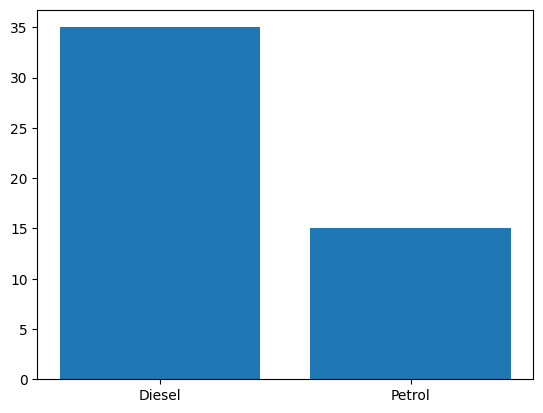

In [ ]:
# 2arg - unique() and value_counts() -> Categorical Data
plt.bar(data['Fuel_Type'].unique(), data['Fuel_Type'].value_counts())
plt.show()

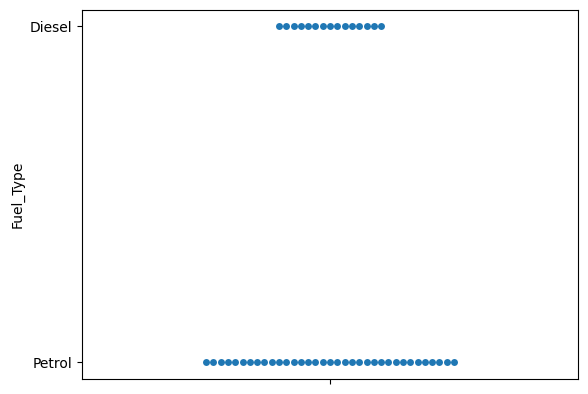

In [ ]:
# 1arg = Categorical Data
sns.swarmplot(data['Fuel_Type'])
plt.show()

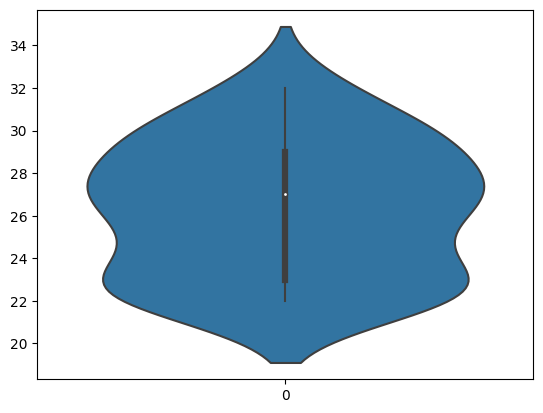

In [ ]:
# 1arg -> Numerical column

sns.violinplot(data['Age'])
plt.show()

**Bivariate Plots**

- scatter plot -> matplotlib.pyplot -> 2 arg

- catplot -> sns -> 1arg-colx, 2arg-coly, 3rd-arg-kind-box, 4th-arg-data=data

- countplot -> sns -> 1arg-1col, 2arg-hue-1col, 3arg-data=data

- crosstab -> pandas -> 1arg-data.col, 2arg-data.2col

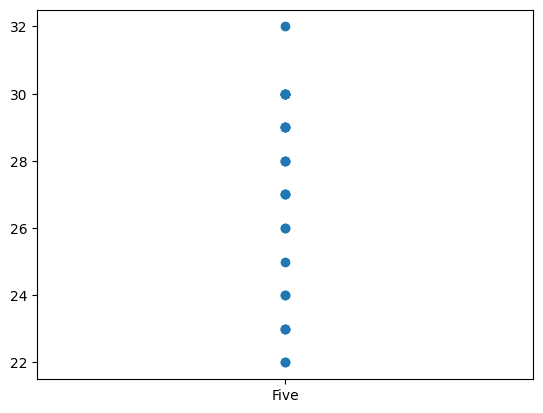

In [ ]:
# 2arg -> Any type of columns

plt.scatter(data['Gears'], data['Age'])
plt.show()

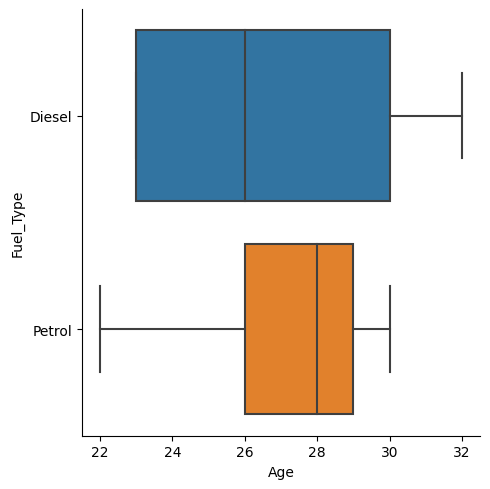

In [ ]:
# 4arg -> X and Y Data, Kind, data=data

sns.catplot(x = 'Age', y='Fuel_Type', kind='box', data=data)

<Axes: xlabel='Age', ylabel='count'>

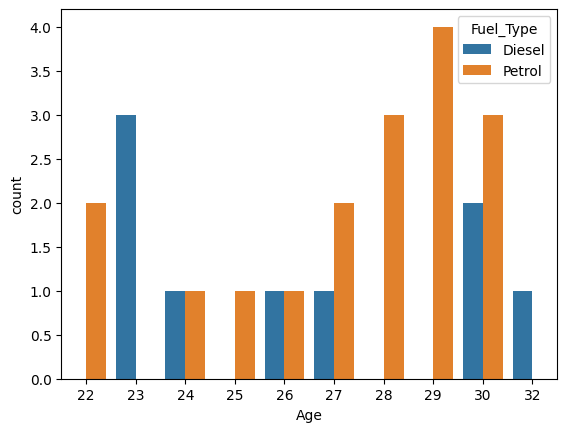

In [ ]:
# 3arg -> X and Y Data, data=data

sns.countplot(x="Age", hue="Fuel_Type", data=data)

In [ ]:
# 2args -> Any two columns of data

pd.crosstab(data['Age'], data['Gears'])

Gears,Five
Age,
22,2
23,3
24,2
25,1
26,2
27,3
28,3
29,4
30,5


**Multivariate Plots**

- pairplot -> sns -> 1arg-data, 2arg-hue

In [ ]:
data.describe()

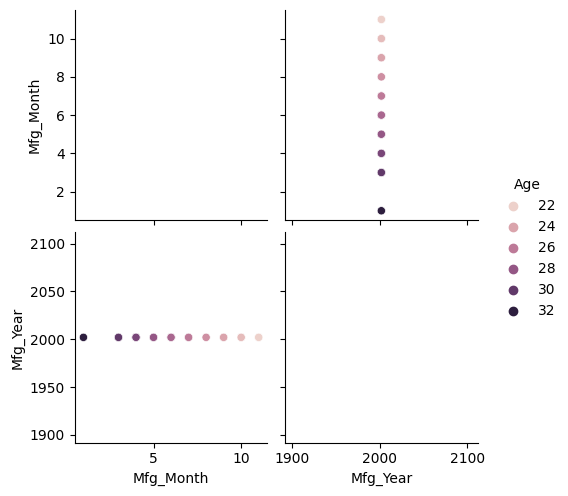

In [ ]:
# 2args -> data, Hue(Only Categorical Columns are feasible)

sns.pairplot(data.iloc[:, 1:4], hue="Age")